In [1]:
# 1. Try other values of lambd, k
# 2. Build graph using this and run CC/networkx on it
# 3. Visualize by making subplot 312 313 as wide as 1:1 unit:unit suggests
# 4. Try other distance metrices
# 5. Idea: to close the feedback loop for finding parameters, need to develop training data (hand-labeled by Mohammed)?
#      -benefit: would not have to physically ask him
# TODO: eliminate duplicates in tweet body (they are spam)

import numpy as np
from sklearn import cluster
from matplotlib import pyplot as plt
data = np.genfromtxt('new_tuples.txt', delimiter=",")
print data[0][0]

1429034040.0


In [2]:
# Normalization
lambd = 10/(24*3.6e+3)
#lambd = 10/(48*3.6e+6) # Bad result
#lambd = 10/(6*3.6e+6) # No difference
k_max=8
#STOP=200
#STOP=142
STOP = len(data)+1
mydata = data[:STOP,:]
mydata[:STOP,0] = data[:STOP,0]*lambd
#400/(lambd*3600*1000*24)
print mydata[0], mydata[141]
#print mydata
print len(mydata)

[  1.65397458e+05   4.25972088e+01   1.82499883e+01] [  1.69426042e+05   4.23356331e+01   1.83126480e+01]
2606


In [14]:
data_label = np.loadtxt('tweet_label.txt', dtype=np.str, delimiter="\n")
#label_list = np.zeros(len(mydata))-1
label_list = np.zeros(len(mydata))
count = 0
for i in range(len(data_label)):
    if data_label[i][2:6]=='http' or data_label[i][3:7]=='http':
        try:
            label_list[count] = int(data_label[i][0:2])
            count+=1
            if count==len(mydata):
                break
            #print( data_label[i][0:2])
        except ValueError:
            continue
    
print np.where(label_list==7)
print label_list[0]

(array([152, 153, 154, 155, 156, 157]),)
0.0


In [4]:
event=10
#print label_list==1
true_centroid = np.zeros((event,3))
for i in range(2,event+2):
    #true_centroid[i-2] = np.sum(label_list==i)
    val = np.mean(mydata[np.where(label_list==i),:],1)
    if np.isnan(val[0,0])==False:
        true_centroid[i-2,:] = val
        
true_centroid = true_centroid[true_centroid[:,0]>0]
print true_centroid

[[  1.69134405e+05   2.66484976e+01   1.56363017e+01]
 [  1.68325500e+05   6.33812863e+01   2.01459854e+01]
 [  1.69143751e+05   4.67160483e+01   2.46428211e+01]]


/Users/carlyang/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/carlyang/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [5]:
event=10
#true_true_centroid = np.array([[1461456000*lambd*1000, 49.127760, 14.542448],[1461628800*lambd*1000, 49.366045, 16.919521]])
true_true_centroid = np.array([[true_centroid[0,0], 49.127760, 14.542448],[true_centroid[1,0], 49.366045, 16.919521]])
print true_true_centroid

[[  1.69134405e+05   4.91277600e+01   1.45424480e+01]
 [  1.68325500e+05   4.93660450e+01   1.69195210e+01]]


In [7]:
curated = mydata#[np.where(label_list>=1)]
#print curated

In [8]:

k=5

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(curated)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
print labels, centroids
print len(labels), len(label_list), len(curated)

[1 1 1 ..., 2 2 3] [[  1.68529153e+05   4.46737517e+01   1.85915038e+01]
 [  1.65600990e+05   4.05463528e+01   2.11005056e+01]
 [  1.69256938e+05   4.29011543e+01   2.11738684e+01]
 [  1.66761712e+05   4.08927974e+01   1.98611473e+01]
 [  1.67708238e+05   4.35351099e+01   1.96669681e+01]]
2606 2606 2606


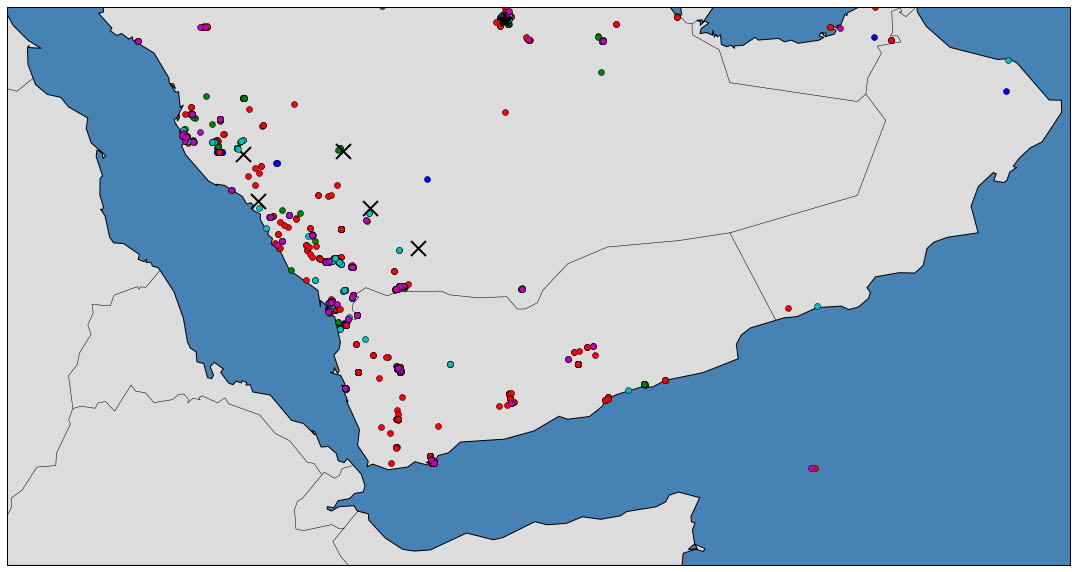

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
import numpy as np

# Lambert Conformal Conic map.
fig = plt.figure(figsize=(20,10))
resolution = 1
themap = Basemap(projection='gall',
              llcrnrlon = 35,
              llcrnrlat = 10,
              urcrnrlon = 60,
              urcrnrlat = 25,
              resolution = 'l',
              area_thresh = 100000.0,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = patches.Polygon( xy, facecolor='red', alpha=0.4 )
    plt.gca().add_patch(poly)

for i in range(k):
    
    # select only data observations with cluster label == i
    ds = curated[np.where(labels==i)]
    #ds = mydata[np.where(label_list==i+2)]
    # plot the data observations
    x, y = themap(ds[:,1],ds[:,2])
    themap.plot( x,y,'o' )
    
    center_x, center_y = themap( centroids[i,1], centroids[i,2] )
    lines = themap.plot(center_x, center_y, 'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
for i in range(len(true_centroid)):
    
    center_x, center_y = themap( true_centroid[i,1], true_centroid[i,2])
    lines2 = themap.plot(center_x, center_y, 'k*')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
             
for i in range(len(true_true_centroid)):
    
    center_x, center_y = themap( true_true_centroid[i,1], true_true_centroid[i,2])
    #lines2 = themap.plot(center_x, center_y, 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
plt.show()
fig.savefig('plot0a.svg', bbox_inches='tight')

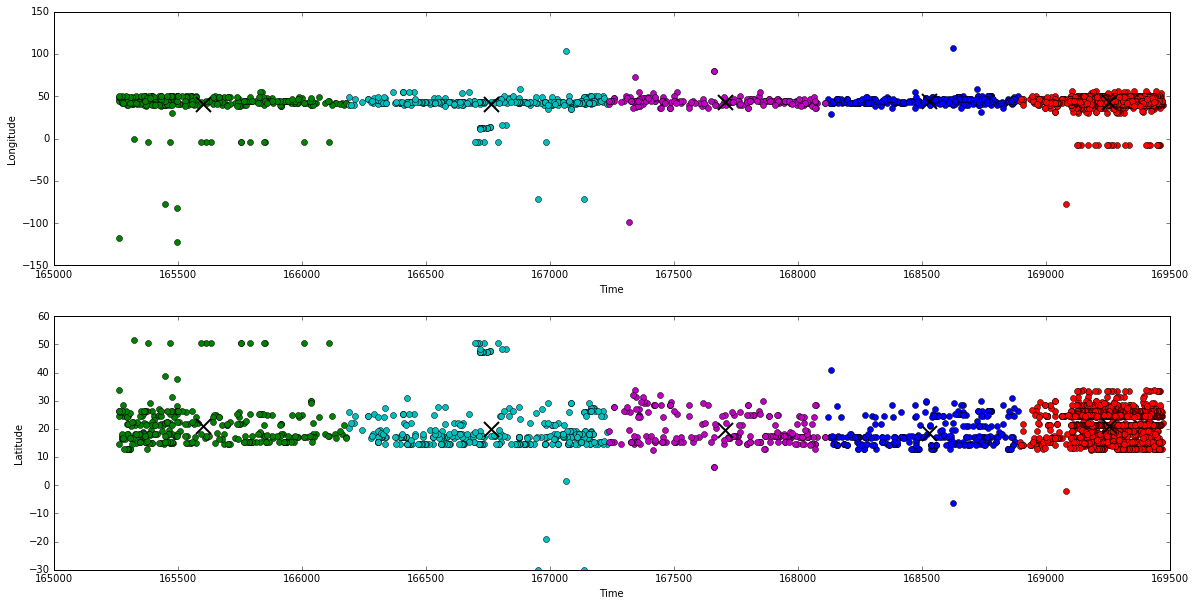

In [15]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
#del ds
for i in range(k):
    
    # select only data observations with cluster label == i
    #ds = curated[np.where(np.logical_and(labels==i,label_list>=1))]
    ds = curated[np.where(labels==i)]
    # plot the data observations
    #ax = plt.subplot(111)
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines1 = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines1,ms=15.0)
    plt.setp(lines1,mew=2.0)
    plt.xlabel('Time')
    plt.ylabel('Longitude')
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
    #ax2.set_ylabel('Longitude')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    plt.xlabel('Time')
    plt.ylabel('Latitude')

for i in range(len(true_centroid)):
    plt.subplot(211)
    #lines2 = plt.plot(true_centroid[i,0], true_centroid[i,1], 'k*')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
    plt.subplot(212)
    #lines2 = plt.plot(true_centroid[i,0], true_centroid[i,2], 'k*')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)

for i in range(len(true_true_centroid)):
    plt.subplot(211)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,1], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
    plt.subplot(212)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,2], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
#ax.set_xlabel('Latitude')
plt.show()
fig.savefig('plot0b.svg', bbox_inches='tight')

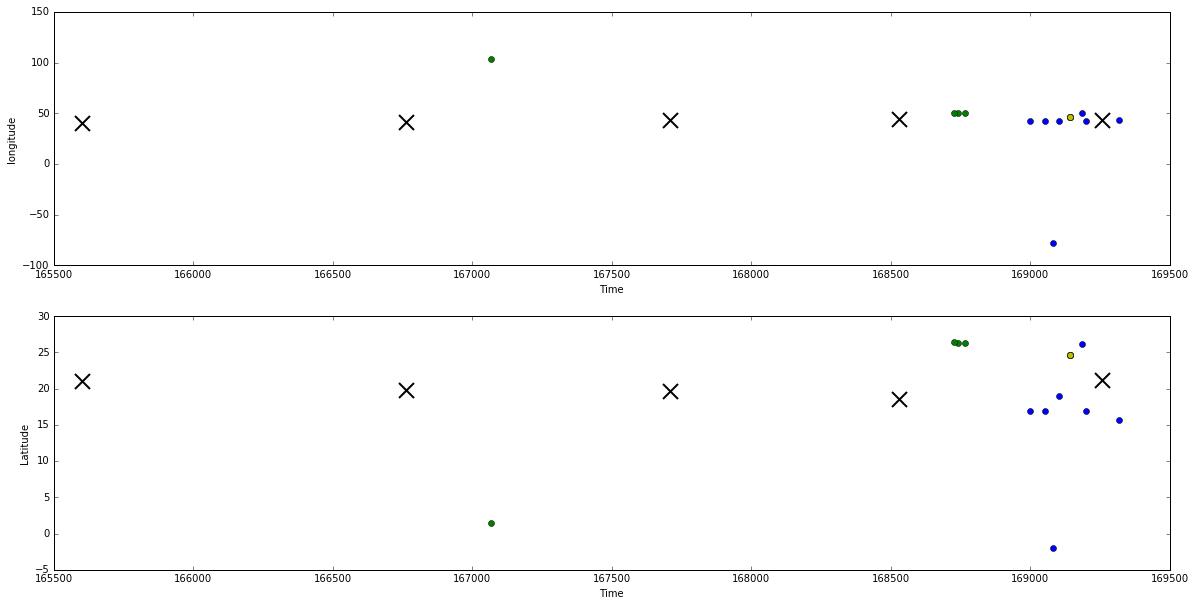

In [16]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
#del ds
for i in range(event):
    
    # select only data observations with cluster label == i
    #ds = curated[np.where(labels==i)]
    ds = mydata[np.where(label_list==i+2)]
    # plot the data observations
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    plt.xlabel('Time')
    plt.ylabel('longitude')
    # plot the centroids
    try:
        lines1 = plt.plot(centroids[i,0],centroids[i,1],'kx')
        plt.setp(lines1,ms=15.0)
        plt.setp(lines1,mew=2.0)
    except IndexError:
        count+=1
        # make the centroid x's bigger
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    plt.xlabel('Time')
    plt.ylabel('Latitude')
    try:
        lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
        plt.setp(lines2,ms=15.0)
        plt.setp(lines2,mew=2.0)
    except IndexError:
        count+=1

for i in range(len(true_centroid)):
    plt.subplot(211)
    #lines2 = plt.plot(true_centroid[i,0], true_centroid[i,1], 'k*')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
    plt.subplot(212)
    #lines2 = plt.plot(true_centroid[i,0], true_centroid[i,2], 'k*')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)

for i in range(len(true_true_centroid)):
    plt.subplot(211)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,1], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
    plt.subplot(212)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,2], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
plt.show()
fig.savefig('plot0d.svg', bbox_inches='tight')

None
[[  1.68529153e+05   4.46737517e+01   1.85915038e+01]
 [  1.65600990e+05   4.05463528e+01   2.11005056e+01]
 [  1.69256938e+05   4.29011543e+01   2.11738684e+01]
 [  1.66761712e+05   4.08927974e+01   1.98611473e+01]
 [  1.67708238e+05   4.35351099e+01   1.96669681e+01]]


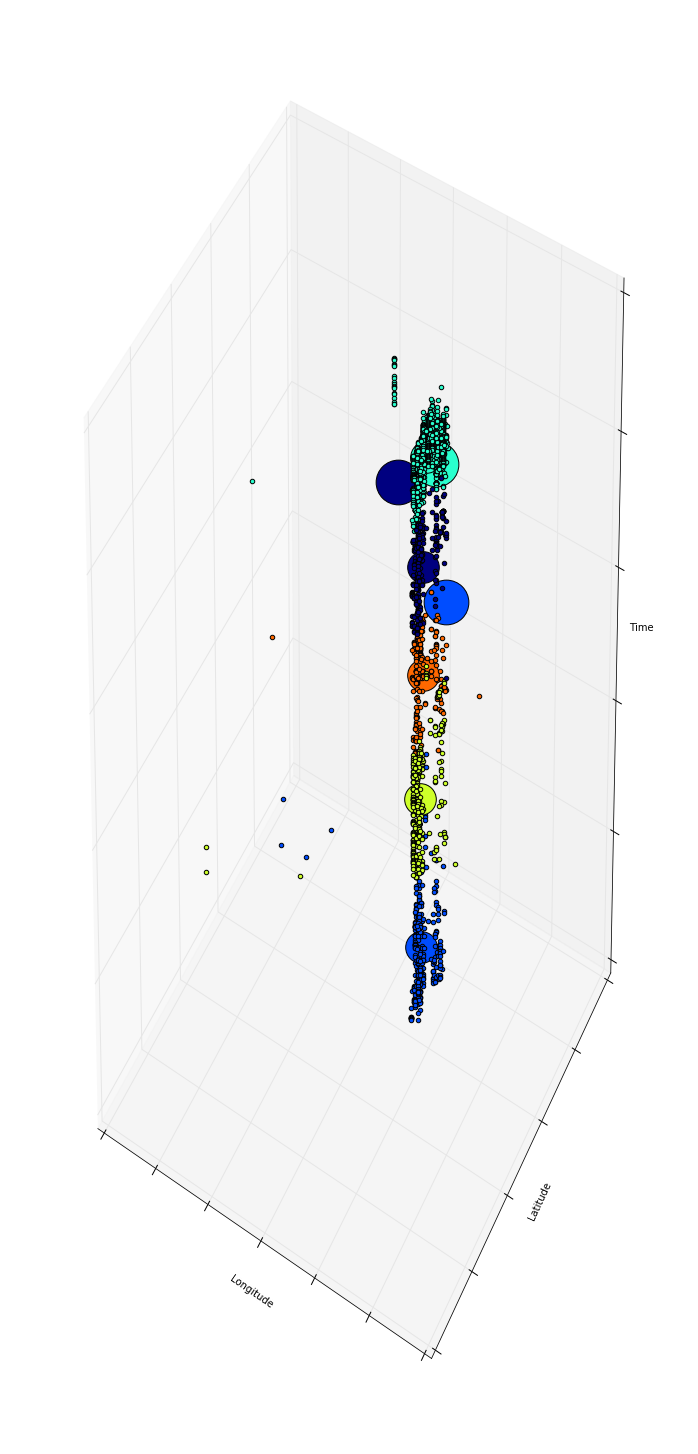

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(1, figsize=(10,20))#plt.figaspect(2), figsize=(10, 8))
plt.clf()
ax = fig.gca(projection='3d')

ax = Axes3D(fig, rect=[0, 0.05, .95, 1])#, elev=48, azim=134)

plt.cla()

cmap = mpl.cm.jet
print ax.set_autoscale_on(True)

for i in range(k):
    ds = curated[np.where(labels==i)]
    ax.scatter(ds[:, 1], ds[:, 2], ds[:, 0], c=cmap(i / float(k)), depthshade=False) #labels.astype(np.float), depthshade=False)
    lines = ax.scatter(centroids[i,1],centroids[i,2],centroids[i,0],c=cmap(i / float(k)),s=1000)
    #ax.setp(lines,ms=15.0)
    #ax.setp(lines,mew=2.0)
for i in range(len(true_centroid)):
    lines = ax.scatter(true_centroid[i,1], true_centroid[i,2], true_centroid[i,0], c=cmap(i/float(k)),s=2000)
print centroids
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')
plt.show()
fig.savefig('plot0e.svg', bbox_inches='tight')